# Image Filtering and Edge Detection

# Libraries used and their versions

The following libraries and their versions were installed and are required to run this program:
```
ipykernel==6.29.5
matplotlib==3.9.2
matplotlib-inline==0.1.7
numpy==2.1.1
opencv-python==4.10.0.84
scikit-image==0.24.0
```

# Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

PATH = "your_path"

# 1. Import Images

We first import and display the images that we will be working with.

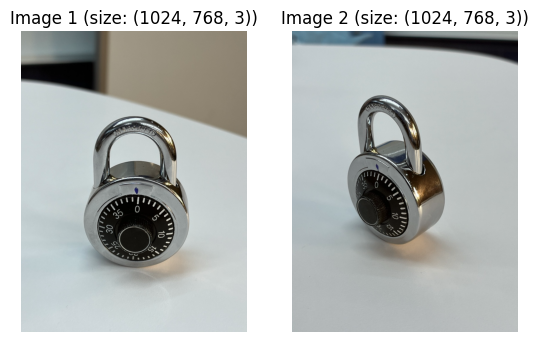

In [2]:
# Load the 2 image
img1 = cv2.imread(PATH+"IMG1.jpg")
img2 = cv2.imread(PATH+"IMG2.jpg")

# Display the 2 images
ax = plt.subplot(1, 2, 1)
plt.imshow(img1)
ax.set_title('Image 1 (size: {})'.format(img1.shape))
plt.axis('off')

ax = plt.subplot(1, 2, 2)
plt.imshow(img2)
ax.set_title('Image 2 (size: {})'.format(img2.shape))
plt.axis('off')
plt.show()


# 2. Convert to grayscale

To convert our image to grayscale, we are given the following line: `np.dot(img1[...,:3], [0.2989, 0.5870, 0.1140])`. First, `img1[...,:3]` selects all  pixels of the image but only for its first three channels (R, G and B), thus ignoring any potential alpha channel. The dot function from numpy then performs a dot product between each pixel's RGB values and the given vector `[0.2989, 0.5870, 0.1140]`. These specific weights are based on human visual perception, where green contributes the most (0.5870), red contributes moderately (0.2989), and blue the least (0.1140). The resulting grayscale value for each pixel is a combination of these channels, effectively collapsing the three-color values into a single brightness value.

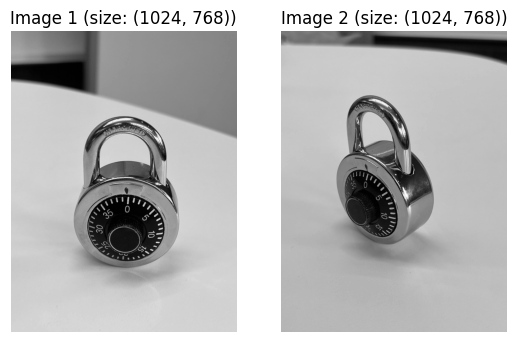

In [3]:
img1_gray = np.dot(img1[...,:3], [0.2989, 0.5870, 0.1140])
img2_gray = np.dot(img2[...,:3], [0.2989, 0.5870, 0.1140])

# Display the 2 images
ax = plt.subplot(1, 2, 1)
plt.imshow(img1_gray, cmap='gray')
ax.set_title('Image 1 (size: {})'.format(img1_gray.shape))
plt.axis('off')

ax = plt.subplot(1, 2, 2)
plt.imshow(img2_gray, cmap='gray')
ax.set_title('Image 2 (size: {})'.format(img2_gray.shape))
plt.axis('off')
plt.show()

# 3. Resize the images

We now resize the images so that the largest dimension has a size of 256 pixels. 

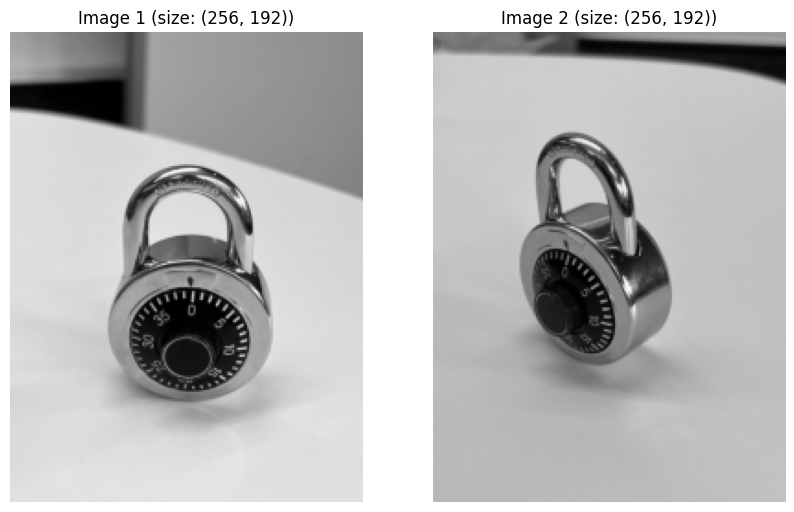

In [4]:
def resize_img(img, max_size=256):
    height = img.shape[0]
    width = img.shape[1]
    if height > width:
        img_resized = resize(img, (max_size, int(max_size*width/height)), anti_aliasing=True)
    else:
        img_resized = resize(img, (int(max_size*height/width), max_size), anti_aliasing=True)
    return img_resized

img1_resized = resize_img(img1_gray)
img2_resized = resize_img(img2_gray)

# Display the 4 images
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 2, 1)
plt.imshow(img1_resized, cmap='gray')
ax.set_title('Image 1 (size: {})'.format(img1_resized.shape))
plt.axis('off')

ax = plt.subplot(1, 2, 2)
plt.imshow(img2_resized, cmap='gray')
ax.set_title('Image 2 (size: {})'.format(img2_resized.shape))
plt.axis('off')

plt.show()

# 4. Smooth the images using Gaussian Smoothing

We first write a function that can perform convolution on an image given a specific filter kernel.

In [5]:
def convolute(img, kernel):
    # Get dimensions of image and kernel
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    # Get the number of padding rows and columns
    vertical_pad = kernel_height // 2
    horizontal_pad = kernel_width // 2

    # Manually pad the image so that the output image is the same size as the input image
    # We use the 'reflect' mode to pad the image which copies the image and flips it along the edges 
    padded_img = np.pad(img, ((vertical_pad, vertical_pad), (horizontal_pad, horizontal_pad)), mode='reflect')

    # Create an empty output array
    output = np.zeros_like(img)
    
    # Perform convolution
    for i in range(img_height):
        for j in range(img_width):
            # Extract region of image corresponding to kernel size
            region = padded_img[i:i + kernel_height, j:j + kernel_width]            
            # Perform element-wise multiplication and sum the result to get the final value
            output[i, j] = np.sum(region * kernel)
    return output

In [6]:
# We use the given gaussian function seen in tutorials
def generate_gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

# Generate a 5x5 and a 15x15 Gaussian kernel both with sigma = 2
gaussian_kernel_5 = generate_gaussian_kernel(5, 1)
gaussian_kernel_15 = generate_gaussian_kernel(15, 2)

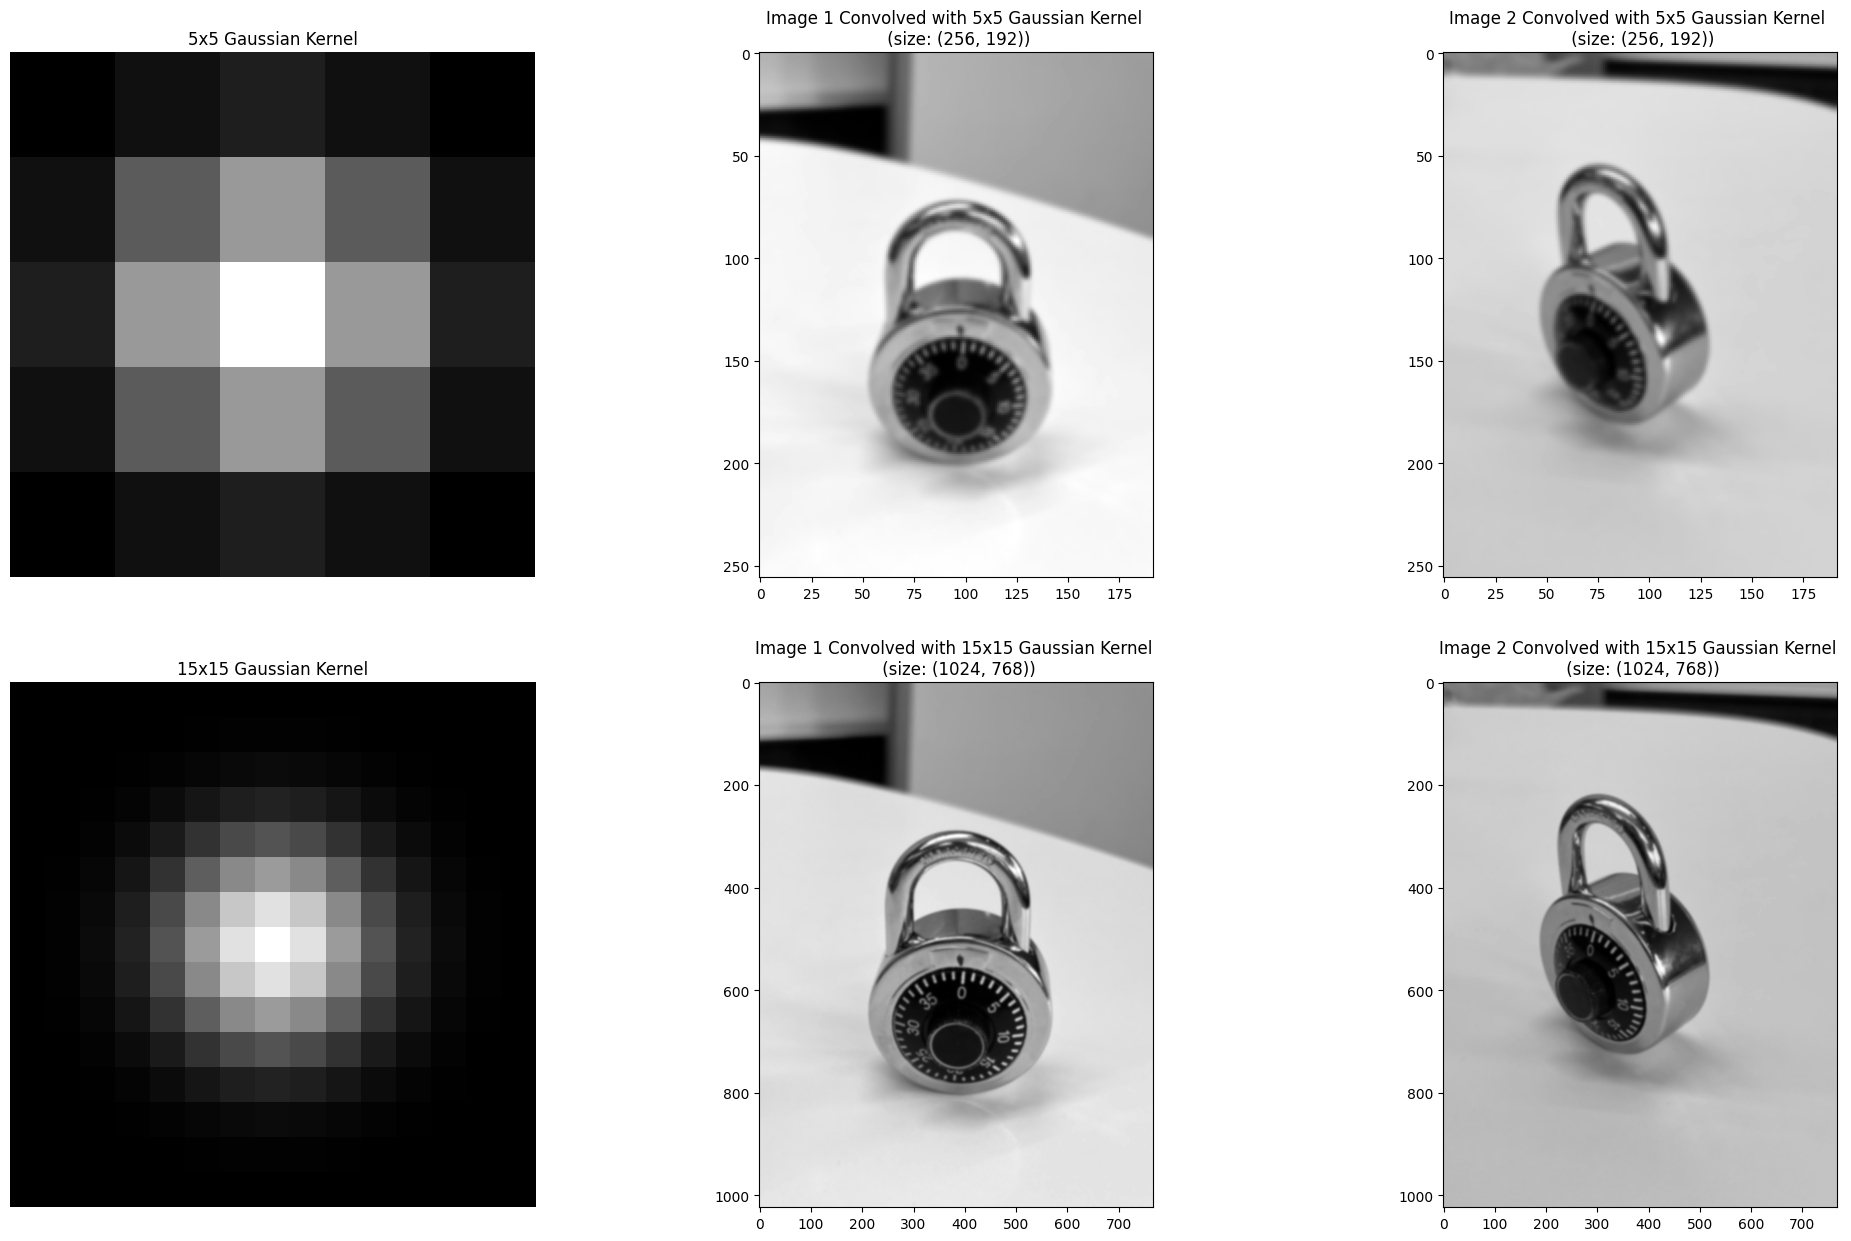

In [7]:
# Convolute both images with the 5x5 Gaussian kernel
img1_gauss_5 = convolute(img1_resized, gaussian_kernel_5)
img2_gauss_5 = convolute(img2_resized, gaussian_kernel_5)
# Convolute both images with the 15x15 Gaussian kernel
img1_gauss_15 = convolute(img1_gray, gaussian_kernel_15)
img2_gauss_15 = convolute(img2_gray, gaussian_kernel_15)

# Plot the results as well as the gaussian kernels (plot should be 2x3)
plt.figure(figsize=(25, 15))
ax = plt.subplot(2, 3, 1)
plt.imshow(gaussian_kernel_5, cmap='gray')
ax.set_title('5x5 Gaussian Kernel')
plt.axis('off')

ax = plt.subplot(2, 3, 2)
plt.imshow(img1_gauss_5, cmap='gray')
ax.set_title('Image 1 Convolved with 5x5 Gaussian Kernel \n (size: {})'.format(img1_gauss_5.shape))

ax = plt.subplot(2, 3, 3)
plt.imshow(img2_gauss_5, cmap='gray')
ax.set_title('Image 2 Convolved with 5x5 Gaussian Kernel \n (size: {})'.format(img2_gauss_5.shape))

ax = plt.subplot(2, 3, 4)
plt.imshow(gaussian_kernel_15, cmap='gray')
ax.set_title('15x15 Gaussian Kernel')
plt.axis('off')

ax = plt.subplot(2, 3, 5)
plt.imshow(img1_gauss_15, cmap='gray')
ax.set_title('Image 1 Convolved with 15x15 Gaussian Kernel \n (size: {})'.format(img1_gauss_15.shape))

ax = plt.subplot(2, 3, 6)
plt.imshow(img2_gauss_15, cmap='gray')
ax.set_title('Image 2 Convolved with 15x15 Gaussian Kernel \n (size: {})'.format(img2_gauss_15.shape))

plt.show()

# 5. Compute the Image Gradients

We now compute the x and y derivative images of each of the smoothed images using the horizontal and vertical Sobel filters. We then display the derivative images in the notebook.

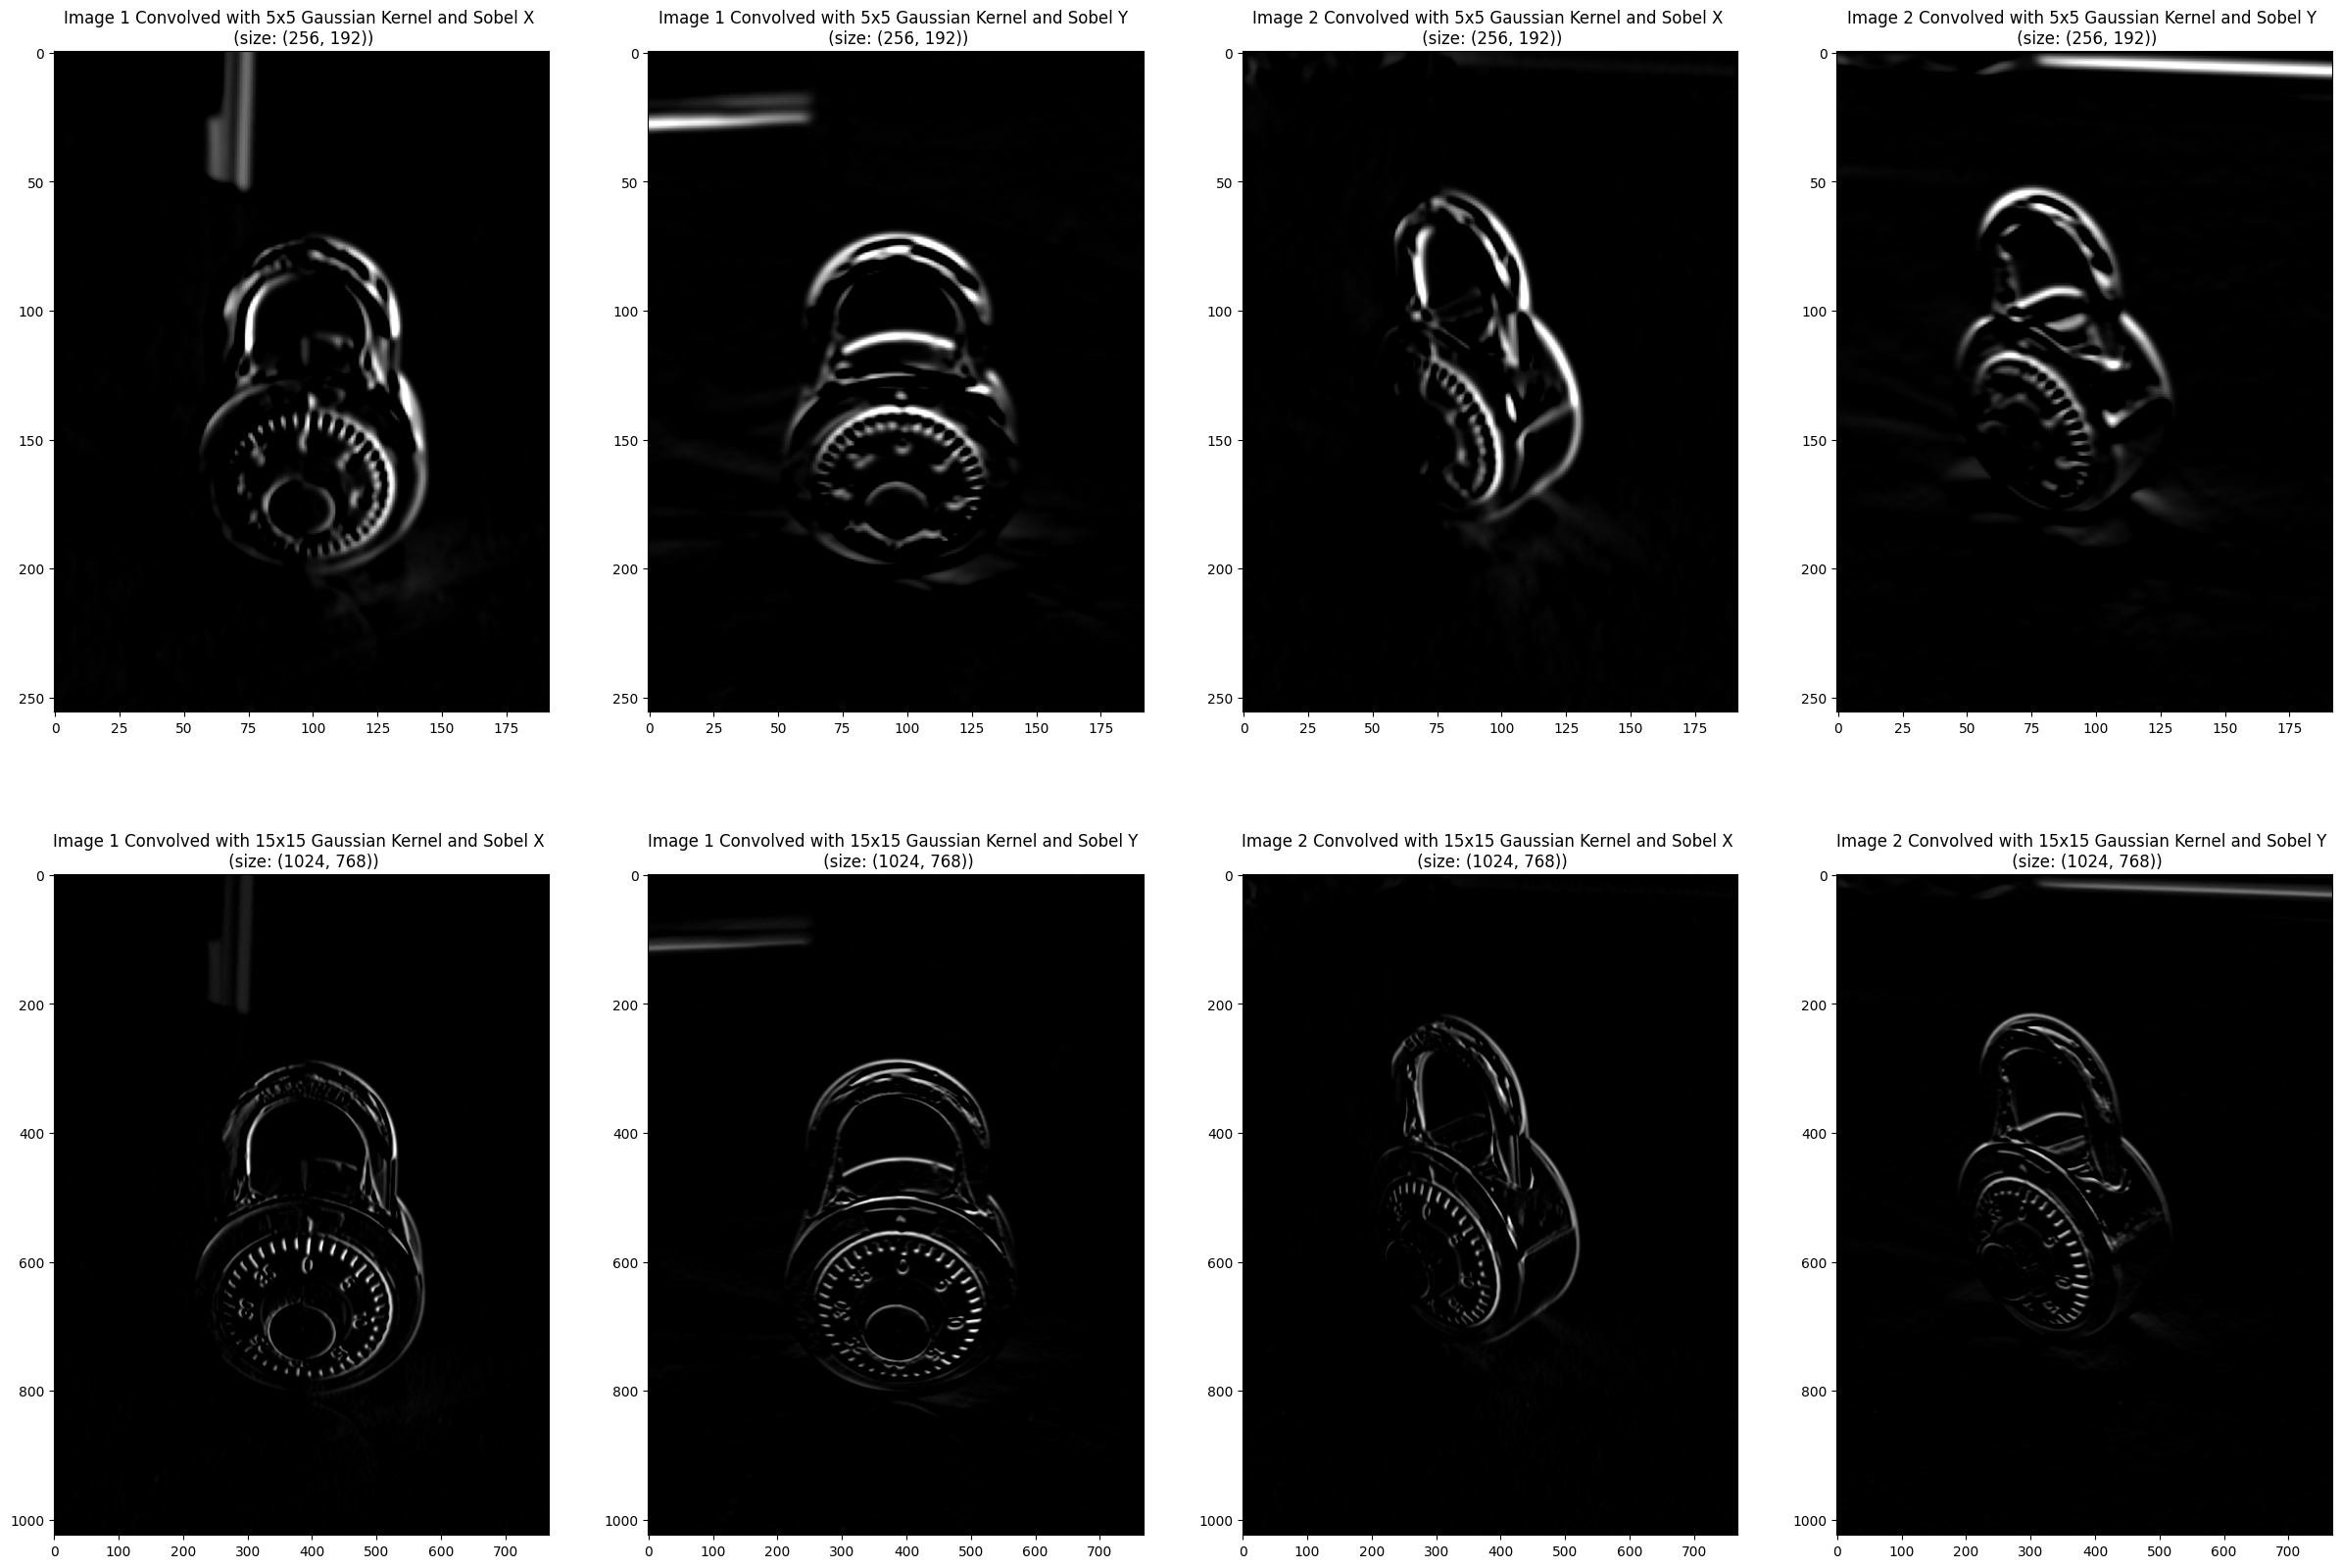

In [8]:
# Sobel filter in x direction (vertical edge detection)
sx = np.array([[-1, 0, 1], 
               [-2, 0, 2],
                [-1, 0, 1]])

# Sobel filter in y direction (horizontal edge detection)
sy = np.array([[1, 2, 1],
              [0, 0, 0],
              [-1, -2, -1]])

# Convolute both images with the Sobel filters
img1_conv_5_sobel_x = convolute(img1_gauss_5, sx)
img1_conv_5_sobel_y = convolute(img1_gauss_5, sy)

img2_conv_5_sobel_x = convolute(img2_gauss_5, sx)
img2_conv_5_sobel_y = convolute(img2_gauss_5, sy)

img1_conv_15_sobel_x = convolute(img1_gauss_15, sx)
img1_conv_15_sobel_y = convolute(img1_gauss_15, sy)

img2_conv_15_sobel_x = convolute(img2_gauss_15, sx)
img2_conv_15_sobel_y = convolute(img2_gauss_15, sy)

# Plot the results (plot should be 2x4)
# We specify vmin=0 and vmax=255 to ensure that each image is displayed correctly because some pixel values fall outside the range [0, 255]
plt.figure(figsize=(30, 20))
ax = plt.subplot(2, 4, 1)
plt.imshow(img1_conv_5_sobel_x, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 1 Convolved with 5x5 Gaussian Kernel and Sobel X \n (size: {})'.format(img1_conv_5_sobel_x.shape))

ax = plt.subplot(2, 4, 2)
plt.imshow(img1_conv_5_sobel_y, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 1 Convolved with 5x5 Gaussian Kernel and Sobel Y \n (size: {})'.format(img1_conv_5_sobel_y.shape))

ax = plt.subplot(2, 4, 3)
plt.imshow(img2_conv_5_sobel_x, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 2 Convolved with 5x5 Gaussian Kernel and Sobel X \n (size: {})'.format(img2_conv_5_sobel_x.shape))

ax = plt.subplot(2, 4, 4)
plt.imshow(img2_conv_5_sobel_y, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 2 Convolved with 5x5 Gaussian Kernel and Sobel Y \n (size: {})'.format(img2_conv_5_sobel_y.shape))

ax = plt.subplot(2, 4, 5)
plt.imshow(img1_conv_15_sobel_x, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 1 Convolved with 15x15 Gaussian Kernel and Sobel X \n (size: {})'.format(img1_conv_15_sobel_x.shape))

ax = plt.subplot(2, 4, 6)
plt.imshow(img1_conv_15_sobel_y, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 1 Convolved with 15x15 Gaussian Kernel and Sobel Y \n (size: {})'.format(img1_conv_15_sobel_y.shape))

ax = plt.subplot(2, 4, 7)
plt.imshow(img2_conv_15_sobel_x, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 2 Convolved with 15x15 Gaussian Kernel and Sobel X \n (size: {})'.format(img2_conv_15_sobel_x.shape))

ax = plt.subplot(2, 4, 8)
plt.imshow(img2_conv_15_sobel_y, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 2 Convolved with 15x15 Gaussian Kernel and Sobel Y \n (size: {})'.format(img2_conv_15_sobel_y.shape))

plt.show()

# 6. Compute the Edge Magnitude and Orientation

We now compute the edge gradient magnitude and orientation of the smoothed images using the Sobel filter values we just computed. We will then display the magnitude and orientation images as described in the assignment guidelines.

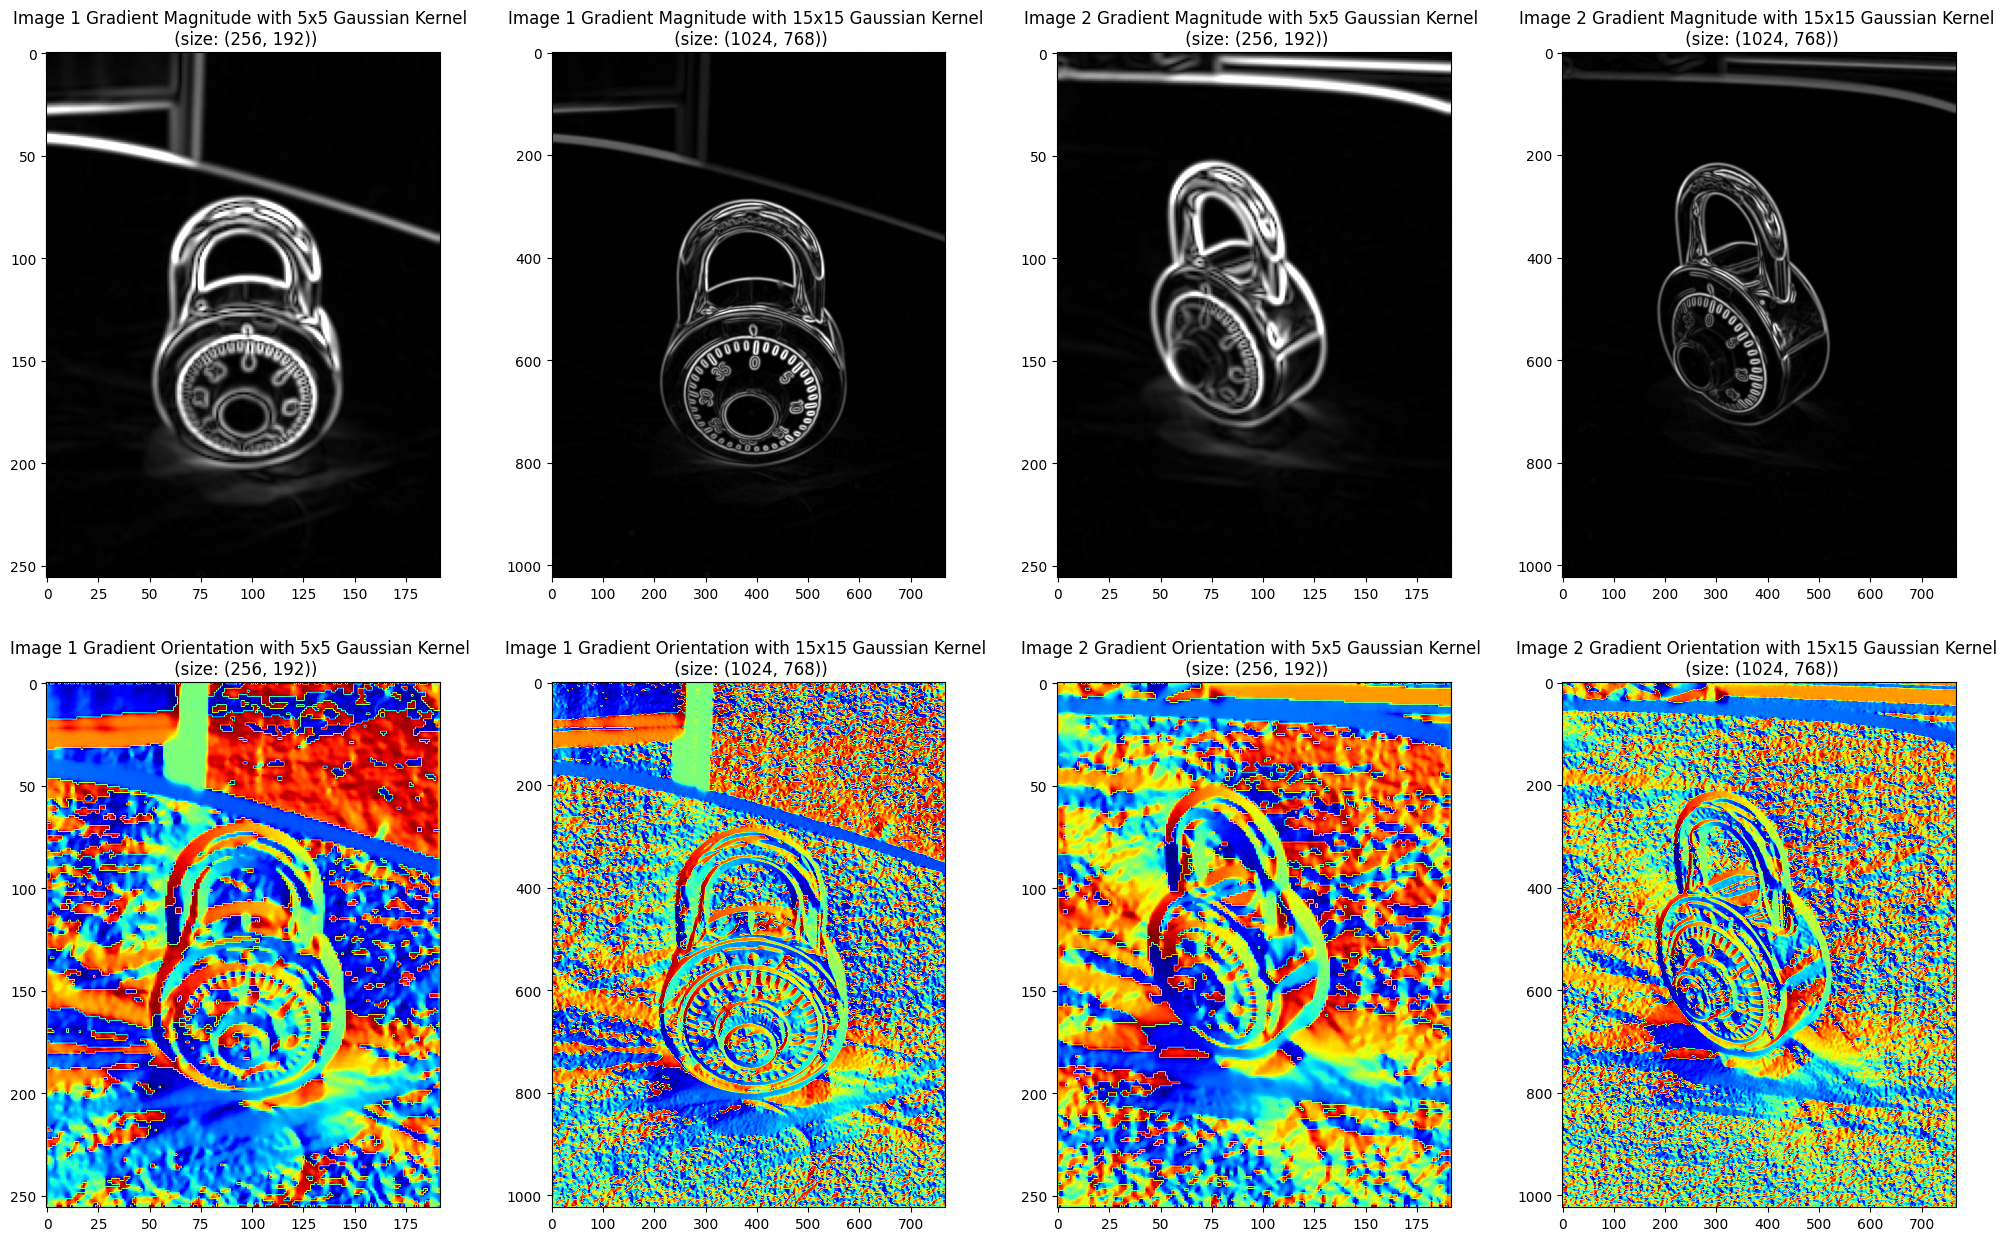

In [9]:
# We first compute the gradient magnitude for each pixel in all 4 blurred images
img1_gauss_5_magnitude = np.sqrt(img1_conv_5_sobel_x**2 + img1_conv_5_sobel_y**2)
img2_gauss_5_magnitude = np.sqrt(img2_conv_5_sobel_x**2 + img2_conv_5_sobel_y**2)

img1_gauss_15_magnitude = np.sqrt(img1_conv_15_sobel_x**2 + img1_conv_15_sobel_y**2)
img2_gauss_15_magnitude = np.sqrt(img2_conv_15_sobel_x**2 + img2_conv_15_sobel_y**2)

# We then compute the gradient orientation for each pixel in all 4 blurred images
img1_gauss_5_orientation = np.arctan2(img1_conv_5_sobel_y, img1_conv_5_sobel_x)
img2_gauss_5_orientation = np.arctan2(img2_conv_5_sobel_y, img2_conv_5_sobel_x)

img1_gauss_15_orientation = np.arctan2(img1_conv_15_sobel_y, img1_conv_15_sobel_x)
img2_gauss_15_orientation = np.arctan2(img2_conv_15_sobel_y, img2_conv_15_sobel_x)

# Plot the results (plot should be 2x4)
plt.figure(figsize=(25, 15))
ax = plt.subplot(2, 4, 1)
plt.imshow(img1_gauss_5_magnitude, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 1 Gradient Magnitude with 5x5 Gaussian Kernel \n (size: {})'.format(img1_gauss_5_magnitude.shape))

ax = plt.subplot(2, 4, 2)
plt.imshow(img1_gauss_15_magnitude, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 1 Gradient Magnitude with 15x15 Gaussian Kernel \n (size: {})'.format(img1_gauss_15_magnitude.shape))


ax = plt.subplot(2, 4, 3)
plt.imshow(img2_gauss_5_magnitude, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 2 Gradient Magnitude with 5x5 Gaussian Kernel \n (size: {})'.format(img2_gauss_5_magnitude.shape))

ax = plt.subplot(2, 4, 4)
plt.imshow(img2_gauss_15_magnitude, cmap='gray', vmin=0, vmax=255)
ax.set_title('Image 2 Gradient Magnitude with 15x15 Gaussian Kernel \n (size: {})'.format(img2_gauss_15_magnitude.shape))


ax = plt.subplot(2, 4, 5)
plt.imshow(img1_gauss_5_orientation, cmap='jet')
ax.set_title('Image 1 Gradient Orientation with 5x5 Gaussian Kernel \n (size: {})'.format(img1_gauss_5_orientation.shape))

ax = plt.subplot(2, 4, 6)
plt.imshow(img1_gauss_15_orientation, cmap='jet')
ax.set_title('Image 1 Gradient Orientation with 15x15 Gaussian Kernel \n (size: {})'.format(img1_gauss_15_orientation.shape))


ax = plt.subplot(2, 4, 7)
plt.imshow(img2_gauss_5_orientation, cmap='jet')
ax.set_title('Image 2 Gradient Orientation with 5x5 Gaussian Kernel \n (size: {})'.format(img2_gauss_5_orientation.shape))

ax = plt.subplot(2, 4, 8)
plt.imshow(img2_gauss_15_orientation, cmap='jet')
ax.set_title('Image 2 Gradient Orientation with 15x15 Gaussian Kernel \n (size: {})'.format(img2_gauss_15_orientation.shape))

plt.show()